### Example for using function load_data and printing dataset 

In [1]:
from hw3_utils import load_data
#downsample the training and validation dataset if needed, ds_rate should be larger than 1.
ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=False)
train_set_x, train_set_y = datasets[0]
valid_set_x, valid_set_y = datasets[1]
test_set_x, test_set_y = datasets[2]
print('Current training data size is %i'%train_set_x.shape[0])
print('Current validation data size is %i'%valid_set_x.shape[0])
print('Current test data size is %i'%test_set_x.shape[0])

Current training data size is 40000
Current validation data size is 10000
Current test data size is 10000


Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)


/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


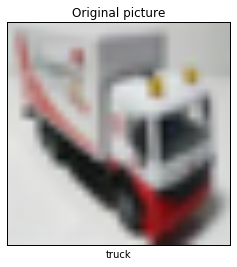

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class_=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#Choose an image index
i=15
plt.imshow(np.reshape(valid_set_x[i],(3,32,32)).transpose(1,2,0))
plt.xticks([])
plt.yticks([])
plt.title('Original picture')
plt.xlabel('%s'%class_[valid_set_y[i]])

# ECBM E6040 Homework 3 - Programming Problem

### Problem 1: Implement the convolutional neural network depicted in this problem

In [3]:
from hw3 import test_lenet
test_lenet(learning_rate=0.1, n_epochs=500, nkerns=[32, 64],
        batch_size=200, filtershape=3, pool_size=2, imageshape=32,verbose=True)

... building the model
... training
training @ iter =  0
training @ iter =  100
epoch 1, minibatch 200/200, validation error 64.180000 %
     epoch 1, minibatch 200/200, test error of best model 63.770000 %
training @ iter =  200
training @ iter =  300
epoch 2, minibatch 200/200, validation error 56.850000 %
     epoch 2, minibatch 200/200, test error of best model 56.290000 %
training @ iter =  400
training @ iter =  500
epoch 3, minibatch 200/200, validation error 52.750000 %
     epoch 3, minibatch 200/200, test error of best model 52.500000 %
training @ iter =  600
training @ iter =  700
epoch 4, minibatch 200/200, validation error 47.260000 %
     epoch 4, minibatch 200/200, test error of best model 47.060000 %
training @ iter =  800
training @ iter =  900
epoch 5, minibatch 200/200, validation error 43.910000 %
     epoch 5, minibatch 200/200, test error of best model 43.920000 %
training @ iter =  1000
training @ iter =  1100
epoch 6, minibatch 200/200, validation error 42.33000

/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
The training process for function test_lenet ran for 18.63m


Best validation error of 32.470000 % obtained at iteration 8600, with test performance 32.460000 %


### Problem 2: Bullet 1: Augmentation by translation

Show a 4*4 figure of 16 input images with this augmentation

In [3]:
from hw3_utils import load_data
from hw3 import translate_image

/Users/haoychen/anaconda/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [21]:
def shift(img):
        shiftX = int(np.random.randint(-5, 6, size=1))
        shiftY = int(np.random.randint(-5, 6, size=1))
        img = np.reshape(img, (3, 32, 32))
        img = translate_image(img, shiftX, shiftY)
        img = img.reshape(3072)
        return img

train_set_x_shift = np.apply_along_axis(shift, 1, train_set_x)

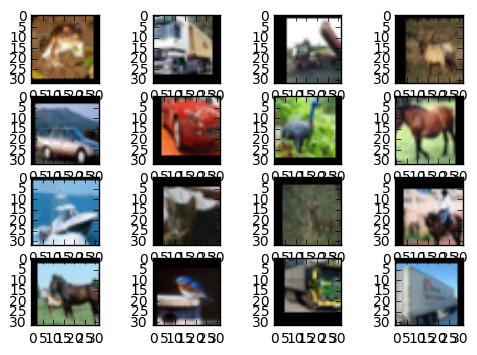

In [23]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(train_set_x_shift[i*4+j].reshape(3, 32, 32).transpose(1, 2, 0))

Implement the neural network with this augmentation, show the improvement

In [1]:
from hw3 import test_lenet_translation

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
test_lenet_translation(learning_rate=0.1, n_epochs=500, nkerns=[32, 64],
        batch_size=200, filtershape=3, pool_size=2, imageshape=32,verbose=True)

... building the model
... training
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 400/400, validation error 59.440000 %
     epoch 1, minibatch 400/400, test error of best model 59.440000 %
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 2, minibatch 400/400, validation error 51.870000 %
     epoch 2, minibatch 400/400, test error of best model 51.870000 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
epoch 3, minibatch 400/400, validation error 45.540000 %
     epoch 3, minibatch 400/400, test error of best model 45.540000 %
training @ iter =  1200
training @ iter =  1300
training @ iter =  1400
training @ iter =  1500
epoch 4, minibatch 400/400, validation error 43.370000 %
     epoch 4, minibatch 400/400, test error of best model 43.370000 %
training @ iter =  1600
training @ iter =  1700
training @ iter =  1800
training @ i

The training process for function test_lenet_translation ran for 17.32m


Comparing to Problem 1, the test performance does not become better. The test error is 33.14%. The reason may be because of only 40,000 shifting images are added to training data and the shifting range may be too large..

### Problem 2: Bullet 2: Augmentation by rotation

Show a 4*4 figure of 16 input images with this augmentation

In [15]:
from hw3_utils import load_data
from hw3 import rotate_image

In [11]:
train_set_x_rotate = np.apply_along_axis(rotate_image, 1, train_set_x)

#### In the following image, I randomly rotate the image by angle = (0, 45), in the training, I choose angle =(0, 5)

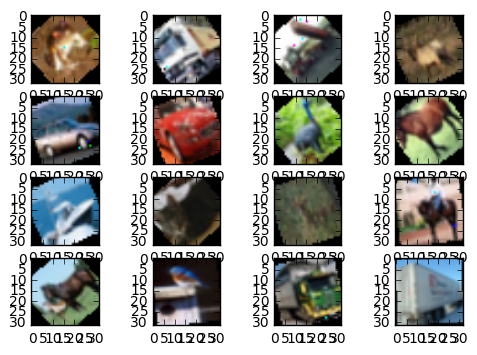

In [12]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(train_set_x_rotate[i*4+j].reshape(3, 32, 32).transpose(1, 2, 0))

Implement the neural network with this augmentation, show the improvement

In [13]:
from hw3 import test_lenet_rotation

In [14]:
test_lenet_rotation(learning_rate=0.1, n_epochs=500, nkerns=[32, 64],
        batch_size=200, filtershape=3, pool_size=2, imageshape=32,verbose=True)

... building the model
... training
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 400/400, validation error 57.180000 %
     epoch 1, minibatch 400/400, test error of best model 57.180000 %
training @ iter =  400
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 2, minibatch 400/400, validation error 46.860000 %
     epoch 2, minibatch 400/400, test error of best model 46.860000 %
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
epoch 3, minibatch 400/400, validation error 42.800000 %
     epoch 3, minibatch 400/400, test error of best model 42.800000 %
training @ iter =  1200
training @ iter =  1300
training @ iter =  1400
training @ iter =  1500
epoch 4, minibatch 400/400, validation error 40.410000 %
     epoch 4, minibatch 400/400, test error of best model 40.410000 %
training @ iter =  1600
training @ iter =  1700
training @ iter =  1800
training @ i

The training process for function test_lenet_rotation ran for 17.41m


By adding rotated image to training set, the test error decrease a bit. The test error is 31.98%.

### Problem 2: Bullet 3: Augmentation by flipping

Show a 4*4 figure of 16 input images with this augmentation

In [5]:
from hw3_utils import load_data
from hw3 import flip_image

In [9]:
def flip_image_random(img):
    switch = int(np.random.randint(0, 2))
    img = flip_image(img, switch)
    return img

train_set_x_flip = np.apply_along_axis(flip_image_random, 1, train_set_x)

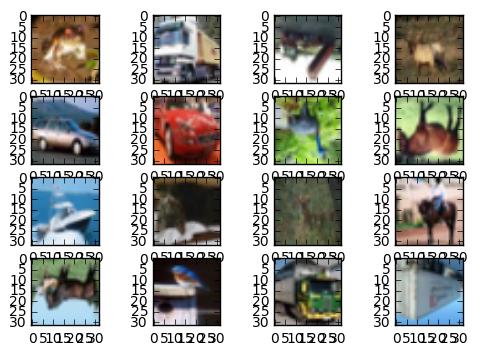

In [6]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(train_set_x_flip[i*4+j].reshape(3, 32, 32).transpose(1, 2, 0))

Implement the neural network with this augmentation, show the improvement

In [11]:
from hw3 import test_lenet_flip

In [12]:
test_lenet_flip(learning_rate=0.1, n_epochs=500, nkerns=[32, 64],
        batch_size=200, filtershape=3, pool_size=2, imageshape=32,verbose=True)

... building the model
... training
training @ iter =  0
training @ iter =  100
epoch 1, minibatch 200/200, validation error 65.010000 %
     epoch 1, minibatch 200/200, test error of best model 65.010000 %
training @ iter =  200
training @ iter =  300
epoch 2, minibatch 200/200, validation error 63.780000 %
     epoch 2, minibatch 200/200, test error of best model 63.780000 %
training @ iter =  400
training @ iter =  500
epoch 3, minibatch 200/200, validation error 56.880000 %
     epoch 3, minibatch 200/200, test error of best model 56.880000 %
training @ iter =  600
training @ iter =  700
epoch 4, minibatch 200/200, validation error 55.150000 %
     epoch 4, minibatch 200/200, test error of best model 55.150000 %
training @ iter =  800
training @ iter =  900
epoch 5, minibatch 200/200, validation error 53.330000 %
     epoch 5, minibatch 200/200, test error of best model 53.330000 %
training @ iter =  1000
training @ iter =  1100
epoch 6, minibatch 200/200, validation error 51.95000

The training process for function test_lenet_flip ran for 18.68m


Fliping the images seems increase the test error a lot. The test error is 40.42%. It may be because too many images are flipped.

### Problem 2: Bullet 4: Augmentation by injecting noise into input

Show a 4*4 figure of 16 input images with this augmentation

In [3]:
from hw3_utils import load_data
from hw3 import noise_injection

/Users/haoychen/anaconda/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [19]:
def noise_injection_on_data(img):
        switch = int(np.random.randint(0, 2))
        mean = 0
        var = 0.05
        img = noise_injection(img, mean, var, switch)
        return img

train_set_x_noise = np.apply_along_axis(noise_injection_on_data, 1, train_set_x)

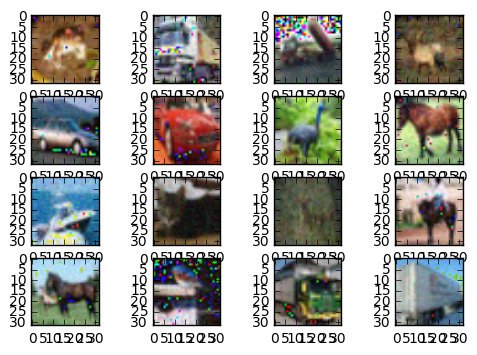

In [20]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(train_set_x_noise[i*4+j].reshape(3, 32, 32).transpose(1, 2, 0))

Implement the neural network with this augmentation, show the improvement

In [1]:
from hw3 import test_lenet_inject_noise_input

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
test_lenet_inject_noise_input(learning_rate=0.1, n_epochs=500, nkerns=[32, 64],
        batch_size=200, filtershape=3, pool_size=2, imageshape=32,verbose=True)

... building the model
... training
training @ iter =  0
training @ iter =  100
epoch 1, minibatch 200/200, validation error 60.030000 %
     epoch 1, minibatch 200/200, test error of best model 60.030000 %
training @ iter =  200
training @ iter =  300
epoch 2, minibatch 200/200, validation error 55.750000 %
     epoch 2, minibatch 200/200, test error of best model 55.750000 %
training @ iter =  400
training @ iter =  500
epoch 3, minibatch 200/200, validation error 51.560000 %
     epoch 3, minibatch 200/200, test error of best model 51.560000 %
training @ iter =  600
training @ iter =  700
epoch 4, minibatch 200/200, validation error 46.490000 %
     epoch 4, minibatch 200/200, test error of best model 46.490000 %
training @ iter =  800
training @ iter =  900
epoch 5, minibatch 200/200, validation error 43.650000 %
     epoch 5, minibatch 200/200, test error of best model 43.650000 %
training @ iter =  1000
training @ iter =  1100
epoch 6, minibatch 200/200, validation error 41.95000

The training process for function test_lenet_inject_noise_input ran for 18.68m


Inject noise to data does not increase the test performance. The test error is 33.34%. In this problem, the noise  randomly come from Gaussian distribution or uniform distribution. It maybe influence the test performance.

### Problem 3: Implement your own achritecture to achieve at least 80% testing accuracy on CIFAR-10 test set

The idea came from **AlexNet**: There are **8 layers** in the model. All convolution operation will not **change the image size (border_mode = 'half')**. The optimizer is **gradient descent with momentum**.

**Layer1 (conv1)**: A convolution layer, the kernel size is (3,3) and the number of kernel is 32. In this layer, after the convolution operation, there is a batch normalization operation, and after normalization, there is a ReLU operation and then do max pooling with pool size (2, 2).

**Layer2 (conv2)**: A convolution layer, the kernel size is (3,3) and the number of kernel is 64, In this layer, after the convolution operation, there is a batch normalization operation, and after normalization, there is a ReLU operation and then do max pooling with pool size (2, 2).

**Layer3 (conv3)**: A convolution layer, the kernel size is (3,3) and the number of kernel is 128. After the convolution operation, there is a ReLU transformation.

**Layer4 (conv4)**: A convolution layer, the kernel size is (3,3) and the number of kernel is 128. After the convolution operation, there is a ReLU transformation.

**Layer5 (conv5)**: A convolution layer, the kernel size is (3,3) and the number of kernel is 64. After the convolution operation, it will do max poolling with pool size (2,2). After that, there is a ReLu transformation.

**Layer6 (fc6)**: A fully connected layer with dropout, the number of neurons is 4096, the dropout rate is 0.5. The activation function is ReLU.

**Layer7 (fc7)**: A fully connected layer with dropout, the number of neurons is 512, the dropout rate is 0.5. The activation function is ReLU.

**Layer8 (softmax)**: A softmax layer with 10 classes.

In [1]:
from hw3 import MY_lenet

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
MY_lenet(learning_rate=0.01, n_epochs=500, nkerns=[32, 64, 128], batch_size=200, verbose=True)

... building the model
... training
training @ iter =  0
training @ iter =  100
epoch 1, minibatch 200/200, validation error 89.860000 %
     epoch 1, minibatch 200/200, test error of best model 90.000000 %
training @ iter =  200
training @ iter =  300
epoch 2, minibatch 200/200, validation error 89.860000 %
training @ iter =  400
training @ iter =  500
epoch 3, minibatch 200/200, validation error 89.860000 %
training @ iter =  600
training @ iter =  700
epoch 4, minibatch 200/200, validation error 87.860000 %
     epoch 4, minibatch 200/200, test error of best model 87.900000 %
training @ iter =  800
training @ iter =  900
epoch 5, minibatch 200/200, validation error 73.970000 %
     epoch 5, minibatch 200/200, test error of best model 73.080000 %
training @ iter =  1000
training @ iter =  1100
epoch 6, minibatch 200/200, validation error 68.180000 %
     epoch 6, minibatch 200/200, test error of best model 66.840000 %
training @ iter =  1200
training @ iter =  1300
epoch 7, minibatch

The training process for function MY_lenet ran for 637.18m


### Problem 4: Implement the convolutional neural network depicted in this problem

In [1]:
from hw3 import MY_CNN
from hw3_utils import load_data
#downsample the training and validation dataset if needed, ds_rate should be larger than 1.
ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=False)

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
import numpy as np
def drop(data, p=0.3):
    mask = np.random.binomial(n=1, p=1-p, size=(data.shape[0], data.shape[1]))
    return np.multiply(data, mask)

In [3]:
original_imgs = datasets
corrupted_imgs = np.copy(datasets)
for i in range(len(corrupted_imgs)):
    data = drop(np.copy(corrupted_imgs[i][0]))
    corrupted_imgs[i] = (data, corrupted_imgs[i][1])

In [4]:
predict_img = MY_CNN(corrupted_imgs, original_imgs, learning_rate=0.0008, n_epochs=128, batch_size = 50,verbose=True, L2_rate = 0.00001)

... building the model
... training
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
training @ iter =  400
epoch 1, minibatch 450/800, validation mse 0.010148 
     epoch 1, minibatch 450/800, test mse of best model 0.010216 
training @ iter =  500
training @ iter =  600
training @ iter =  700
training @ iter =  800
epoch 2, minibatch 100/800, validation mse 0.008769 
     epoch 2, minibatch 100/800, test mse of best model 0.008831 
training @ iter =  900
training @ iter =  1000
training @ iter =  1100


The training process for function <module> ran for 38.55m


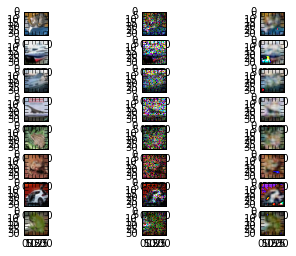

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
f, axarr = plt.subplots(8,3)
for i in range(8):
    for j in range(3):
        if j == 0:
            axarr[i, j].imshow(original_imgs[2][0][i].reshape(3, 32, 32).transpose(1, 2, 0))
        elif j == 1:
            axarr[i, j].imshow(corrupted_imgs[2][0][i].reshape(3, 32, 32).transpose(1, 2, 0))
        else:
            axarr[i, j].imshow(predict_img[i].transpose(1, 2, 0))

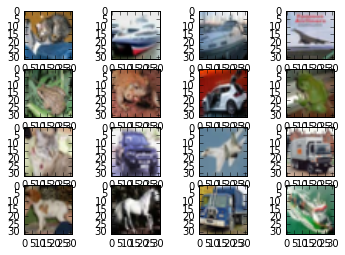

In [11]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(original_imgs[2][0][i*4+j].reshape(3, 32, 32).transpose(1, 2, 0))

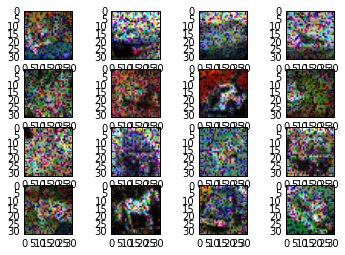

In [12]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(corrupted_imgs[2][0][i*4+j].reshape(3, 32, 32).transpose(1, 2, 0))

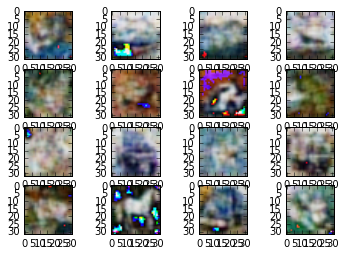

In [13]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(predict_img[i*4+j].reshape(3, 32, 32).transpose(1, 2, 0))